<a href="https://colab.research.google.com/github/zakkaizzatur/Data-Related-Projects/blob/main/Car_Price_Regression_using_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'zakkaizzatur'
os.environ['KAGGLE_KEY'] = 'ebfe0360db68f192c2b32c725f0c6b43'

In [ ]:
!kaggle datasets download -d tunguz/used-car-auction-prices

 26% 5.00M/19.0M [00:00<00:00, 42.6MB/s]
100% 19.0M/19.0M [00:00<00:00, 92.6MB/s]


In [ ]:
!unzip -q used-car-auction-prices.zip -d .

In [ ]:
link = '/content/car_prices.csv'

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.7MB/s 
     |████████████████████████████████| 174kB 42.9MB/s 
     |████████████████████████████████| 112kB 47.5MB/s 
     |████████████████████████████████| 2.0MB 35.2MB/s 
     |████████████████████████████████| 256kB 48.0MB/s 
     |████████████████████████████████| 14.4MB 215kB/s 
     |████████████████████████████████| 1.7MB 48.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
     |████████████████████████████████| 276kB 52.1MB/s 
     |████████████████████████████████| 1.4MB 44.7MB/s 
     |████████████████████████████████| 6.8MB 42.5MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 112kB 57.7MB/s 
     |████████████████████████████████| 81kB 11.9MB/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pr

In [ ]:
df = pd.read_csv(link, error_bad_lines=False,warn_bad_lines=True)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.drop(['vin','seller'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
state               0
condition       11794
odometer           94
color             749
interior          749
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   state         472336 non-null  object 
 7   condition     472336 non-null  float64
 8   odometer      472336 non-null  float64
 9   color         472336 non-null  object 
 10  interior      472336 non-null  object 
 11  mmr           472336 non-null  int64  
 12  sellingprice  472336 non-null  int64  
 13  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 54.1+ MB


In [ ]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
df.make = df.make.str.capitalize()

In [ ]:
df.make.unique()

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
dictname = {'Gmc truck': 'Gmc', 'Dodge tk':'Dodge', 'Mazda tk':'Mazda', 'Hyundai tk':'Hyundai', 'Mercedes-b':'Mercedes-benz','Chev truck':'Chevrolet','Vw':'Volkswagen','Landrover':'Land rover', 'Ford truck':'Ford', 'Mercedes':'Mercedes-benz','Ford tk':'Ford'}

In [ ]:
df.make = df.make.map(dictname).fillna(df.make)

In [ ]:
df.body = df.body.str.capitalize()

In [ ]:
df.body.unique()

array(['Suv', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew cab', 'G coupe', 'G sedan', 'Elantra coupe', 'Genesis coupe',
       'Minivan', 'Van', 'Double cab', 'Crewmax cab', 'Access cab',
       'King cab', 'Cts coupe', 'Supercrew', 'E-series van',
       'Extended cab', 'Supercab', 'G convertible', 'Koup', 'Regular cab',
       'Quad cab', 'Cts-v coupe', 'G37 convertible', 'Club cab',
       'Xtracab', 'Q60 convertible', 'Cts wagon', 'G37 coupe', 'Mega cab',
       'Cab plus 4', 'Q60 coupe', 'Beetle convertible', 'Tsx sport wagon',
       'Promaster cargo van', 'Cab plus', 'Granturismo convertible',
       'Cts-v wagon', 'Ram van', 'Transit van', 'Regular-cab'],
      dtype=object)

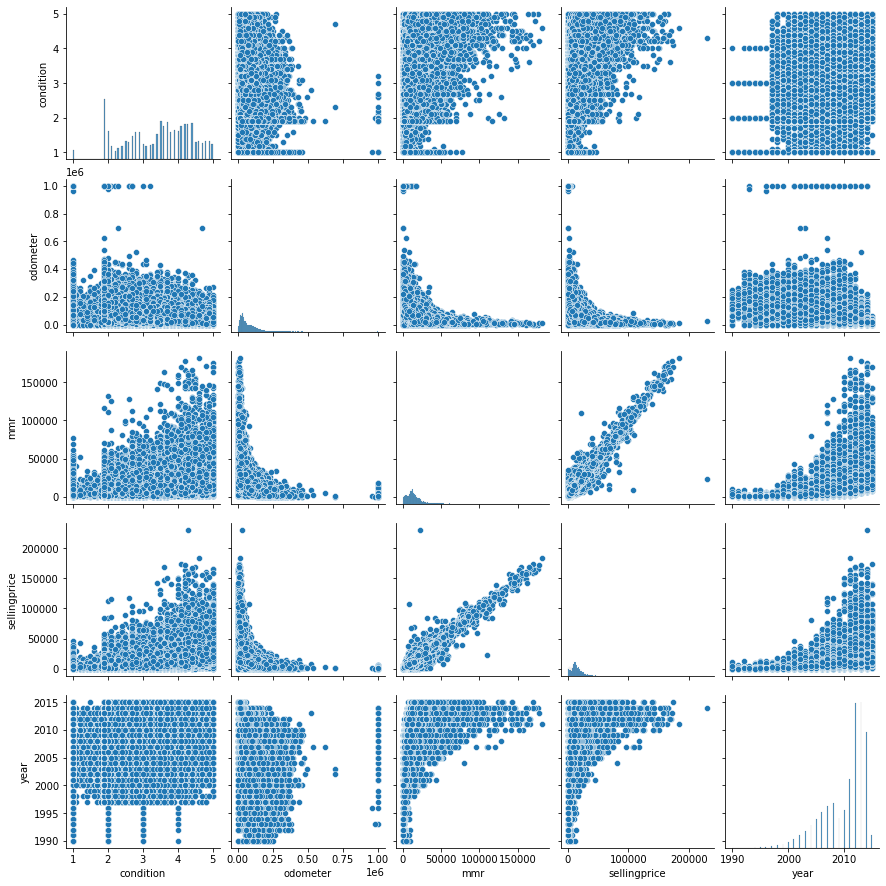

In [ ]:
sns.pairplot(df[['condition', 'odometer', 'mmr', 'sellingprice', 'year']])

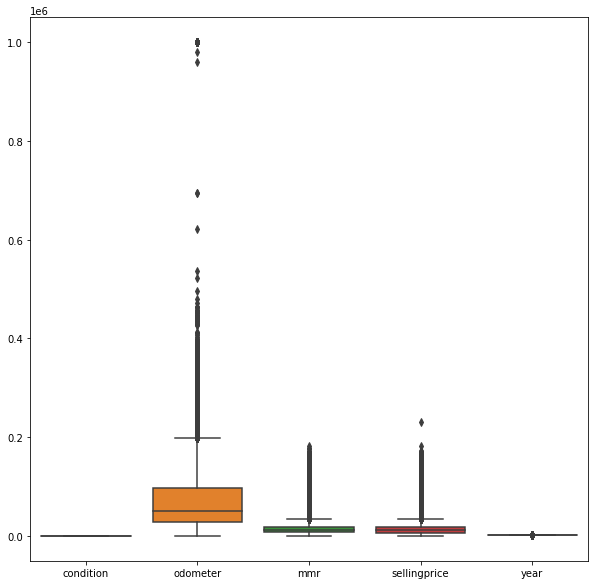

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df[['condition', 'odometer', 'mmr', 'sellingprice', 'year']])
plt.show()

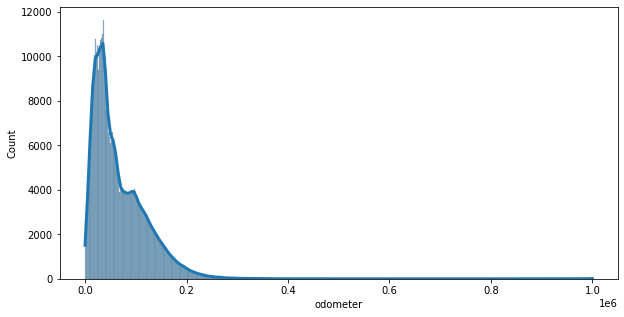

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df.odometer, kde=True, line_kws={'linewidth':3} )
plt.show()

In [ ]:
numerical_column = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df[numerical_column])

mask = yhat != -1

In [ ]:
df2 = df[mask]

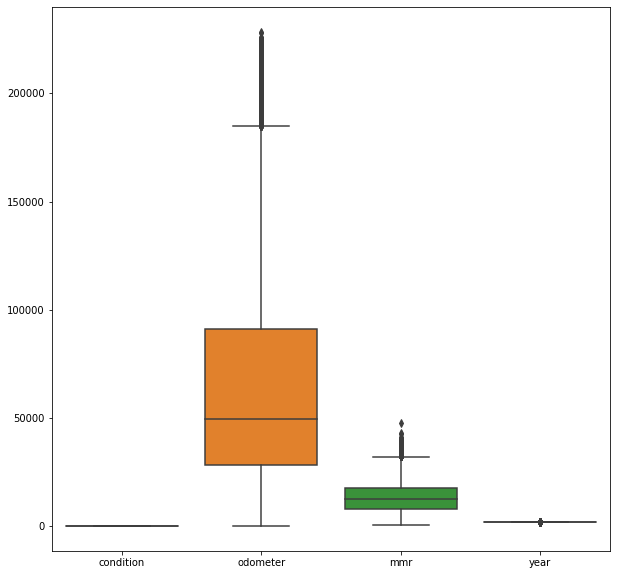

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df2[['condition', 'odometer', 'mmr', 'year']])
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from pycaret.regression import*

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2.drop(columns='index', inplace=True)

In [ ]:
df2

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,Suv,automatic,ca,5.0,16639.0,white,black,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,Suv,automatic,ca,5.0,9393.0,white,beige,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.0,28617.0,black,black,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425097,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,ma,3.7,97036.0,silver,gray,8300,7800,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
425098,2011,Bmw,5 Series,528i,Sedan,automatic,fl,3.9,66403.0,white,brown,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
425099,2012,Bmw,X5,xDrive35d,Suv,automatic,ca,4.8,50561.0,black,black,29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
425100,2015,Nissan,Altima,2.5 S,Sedan,automatic,ga,3.8,16658.0,white,black,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
df3 = df2.sample(frac=0.1)
df3

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
220386,2013,Infiniti,G Sedan,G37x,G sedan,automatic,ga,4.6,16363.0,gray,black,22400,22000,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
238569,2006,Hyundai,Sonata,LX,Sedan,automatic,wi,2.5,149852.0,black,gray,2775,2300,Wed Mar 04 2015 02:00:00 GMT-0800 (PST)
20356,2012,Honda,Odyssey,EX,Minivan,automatic,pa,4.2,26257.0,silver,gray,18350,20800,Fri Dec 19 2014 09:30:00 GMT-0800 (PST)
16950,2013,Ford,Fiesta,SE,Sedan,automatic,tx,3.5,29421.0,—,gray,9250,9500,Thu Dec 18 2014 10:30:00 GMT-0800 (PST)
339439,2013,Nissan,Versa,1.6 S Plus,Sedan,automatic,il,3.7,45525.0,white,gray,8775,8700,Thu May 28 2015 03:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350278,2014,Nissan,Rogue Select,S,Suv,automatic,la,4.1,5193.0,red,black,15900,16000,Wed Jun 03 2015 03:00:00 GMT-0700 (PDT)
181235,2008,Ford,F-250 Super Duty,XL,Supercab,automatic,co,2.6,102500.0,white,tan,7725,9000,Wed Feb 25 2015 03:30:00 GMT-0800 (PST)
163813,2012,Mazda,Mazda3,i Touring,Sedan,automatic,fl,3.1,29494.0,white,black,11550,10300,Tue Feb 03 2015 01:30:00 GMT-0800 (PST)
336642,2007,Dodge,Durango,Limited,Suv,automatic,az,1.9,101924.0,silver,gray,7300,6800,Thu May 21 2015 05:00:00 GMT-0700 (PDT)


In [ ]:
reg1 = setup(data=df3, 
             target = 'sellingprice',
             numeric_imputation = 'mean',
             categorical_features = ['make','transmission','color','body'],
             silent = True,
             use_gpu = True,
             session_id = 1)

,Description,Value
0,session_id,1
1,Target,sellingprice
2,Original Data,"(42510, 14)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(29756, 3425)"


In [ ]:
compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,876.3499,1.761857e+06,1326.5538,0.9671,0.1719,0.1081,2.718
br,Bayesian Ridge,895.4746,1.822756e+06,1349.0825,0.9660,0.1929,0.1093,181.578
lasso,Lasso Regression,898.8704,1.841199e+06,1355.8235,0.9656,0.1873,0.1092,45.567
gbr,Gradient Boosting Regressor,905.6423,1.856648e+06,1361.6475,0.9653,0.1793,0.1143,112.566
rf,Random Forest Regressor,909.0761,1.895082e+06,1375.6733,0.9646,0.1764,0.1113,274.958
ridge,Ridge Regression,924.3884,1.906486e+06,1379.8777,0.9644,0.2139,0.1148,3.641
lar,Least Angle Regression,904.9587,1.905497e+06,1378.9644,0.9644,0.1962,0.1103,4.648
et,Extra Trees Regressor,913.2427,1.927560e+06,1387.3011,0.9640,0.1776,0.1119,471.837
llar,Lasso Least Angle Regression,938.2238,1.978478e+06,1405.6031,0.9631,0.1809,0.1159,3.414
omp,Orthogonal Matching Pursuit,919.8920,1.978935e+06,1405.1909,0.9631,0.1989,0.1134,3.618


[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=1,
       selection='cyclic', tol=0.0001, warm_start=False)]

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,834.6595,1.556095e+06,1247.4354,0.9710,0.1602,0.1017
1,873.3994,1.784851e+06,1335.9832,0.9671,0.1715,0.1084
2,878.6281,1.747749e+06,1322.0244,0.9674,0.1707,0.1078
3,901.2862,1.916058e+06,1384.2176,0.9628,0.1621,0.1035
4,856.9881,1.651236e+06,1285.0042,0.9707,0.1769,0.1086
5,888.7445,1.829617e+06,1352.6334,0.9660,0.1741,0.1095
6,870.6819,1.655661e+06,1286.7249,0.9679,0.1832,0.1163
7,900.1185,1.951457e+06,1396.9457,0.9634,0.1741,0.1073
8,880.3307,1.669429e+06,1292.0639,0.9688,0.1715,0.1077
9,878.6621,1.856420e+06,1362.5052,0.9662,0.1743,0.1098


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,877.7189,1.659968e+06,1288.3974,0.9690,0.1641,0.1044
1,926.7912,1.871023e+06,1367.8534,0.9655,0.1789,0.1127
2,910.4967,1.840881e+06,1356.7908,0.9656,0.1734,0.1109
3,950.4312,2.018117e+06,1420.6043,0.9609,0.1663,0.1080
4,876.3808,1.706066e+06,1306.1647,0.9697,0.1760,0.1086
5,911.7704,1.859635e+06,1363.6842,0.9654,0.1775,0.1112
6,890.7095,1.690156e+06,1300.0601,0.9673,0.1793,0.1173
7,933.3663,1.998273e+06,1413.6028,0.9625,0.1775,0.1100
8,934.7128,1.800145e+06,1341.6947,0.9664,0.1746,0.1123
9,891.3401,1.862757e+06,1364.8285,0.9661,0.1761,0.1119


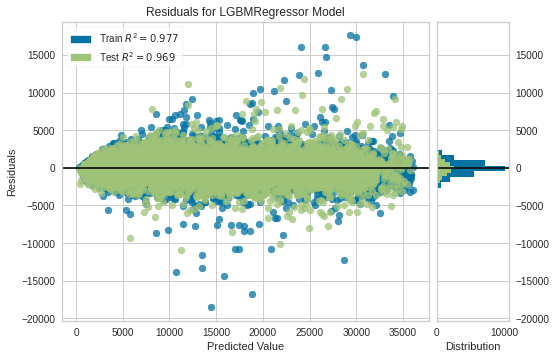

In [ ]:
plot_model(tuned_lightgbm)

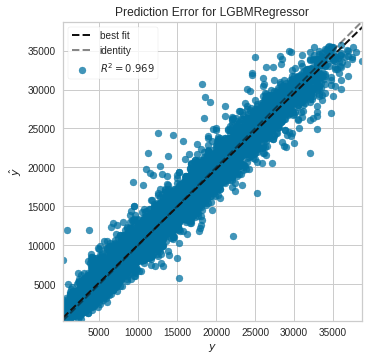

In [ ]:
plot_model(tuned_lightgbm, plot='error')

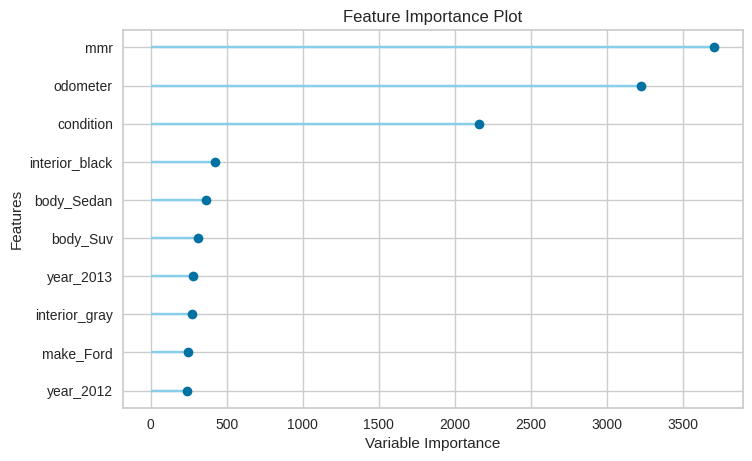

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,893.3325,1.634084e+06,1278.313,0.9691,0.1728,0.1099


,condition,odometer,mmr,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,make_Acura,make_Audi,make_Bmw,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Fiat,make_Ford,make_Gmc,make_Honda,make_Hummer,make_Hyundai,make_Infiniti,make_Isuzu,make_Jaguar,make_Jeep,make_Kia,make_Land rover,...,saledate_2015-06-30 084500+0700,saledate_2015-06-30 090000+0700,saledate_2015-06-30 093000+0700,saledate_2015-07-01 060000+0700,saledate_2015-07-01 063000+0700,saledate_2015-07-01 070000+0700,saledate_2015-07-01 073000+0700,saledate_2015-07-01 091500+0700,saledate_2015-07-01 093000+0700,saledate_2015-07-01 114000+0700,saledate_2015-07-02 060000+0700,saledate_2015-07-02 070000+0700,saledate_2015-07-02 080000+0700,saledate_2015-07-02 090000+0700,saledate_2015-07-02 093000+0700,saledate_2015-07-03 060000+0700,saledate_2015-07-03 080000+0700,saledate_2015-07-07 061500+0700,saledate_2015-07-07 062000+0700,saledate_2015-07-07 063000+0700,saledate_2015-07-07 070000+0700,saledate_2015-07-07 073000+0700,saledate_2015-07-07 080000+0700,saledate_2015-07-07 093000+0700,saledate_2015-07-07 171500+0700,saledate_2015-07-08 063000+0700,saledate_2015-07-08 070000+0700,saledate_2015-07-08 072000+0700,saledate_2015-07-08 073000+0700,saledate_2015-07-08 093000+0700,saledate_2015-07-08 103000+0700,saledate_2015-07-08 171500+0700,saledate_2015-07-09 055000+0700,saledate_2015-07-09 060000+0700,saledate_2015-07-09 063000+0700,saledate_2015-07-09 064500+0700,saledate_2015-07-09 070000+0700,saledate_2015-07-09 080000+0700,sellingprice,Label
0,4.0,18194.0,16300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16200.0,16407.765123
1,1.9,97816.0,3950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,2937.274439
2,2.7,112631.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,1670.486022
3,3.6,187254.0,4175.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,5047.751465
4,2.5,36760.0,12250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11400.0,11499.130988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12749,4.1,27140.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [ ]:
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=100, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=280, n_jobs=-1, num_leaves=70, objective=None,
              random_state=1, reg_alpha=0.1, reg_lambda=0.001, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,764.1291,1163156.41,1078.4973,0.978,0.1559,0.0969


In [ ]:
df4 = df2.drop(df3.index).reset_index(drop=True)
df5 = df4.sample(frac=0.1)
df5

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
287471,2014,Ford,Expedition,Limited,Suv,automatic,pa,4.9,13830.0,white,gray,24700,23250,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT)
283401,2013,Toyota,RAV4,LE,Suv,automatic,il,3.8,53709.0,white,gray,15950,16000,Thu Jun 04 2015 03:30:00 GMT-0700 (PDT)
278278,2014,Infiniti,Q50,Premium,Sedan,automatic,tx,3.4,8537.0,brown,black,30800,29200,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)
368264,2012,Hyundai,Sonata,SE,Sedan,automatic,ga,3.5,47766.0,black,black,12050,12300,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
309176,2011,Bmw,X5,xDrive35d,Suv,automatic,nj,3.9,72960.0,black,brown,23800,23800,Wed Jun 03 2015 02:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82321,2005,Nissan,Altima,2.5 S,Sedan,automatic,fl,1.9,99523.0,gold,beige,3925,3400,Wed Jan 14 2015 07:56:00 GMT-0800 (PST)
217282,2008,Nissan,Sentra,2.0,Sedan,automatic,ga,3.8,75137.0,red,gray,5400,7100,Thu Feb 19 2015 02:00:00 GMT-0800 (PST)
197250,2012,Cadillac,SRX,Base,Suv,automatic,tx,3.5,28002.0,black,black,21600,21800,Wed Feb 25 2015 02:20:00 GMT-0800 (PST)
355174,2007,Bmw,3 Series,335i,Coupe,manual,nj,2.8,66731.0,white,black,13750,14800,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)


In [ ]:
realdata_pred = predict_model(final_lightgbm, data=df5)
realdata_pred.to_csv('predicted.csv', index=False)
realdata_pred.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,Label
287471,2014,Ford,Expedition,Limited,Suv,automatic,pa,4.9,13830.0,white,gray,24700,23250,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT),25310.329700
283401,2013,Toyota,RAV4,LE,Suv,automatic,il,3.8,53709.0,white,gray,15950,16000,Thu Jun 04 2015 03:30:00 GMT-0700 (PDT),16355.896849
278278,2014,Infiniti,Q50,Premium,Sedan,automatic,tx,3.4,8537.0,brown,black,30800,29200,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),29246.101548
368264,2012,Hyundai,Sonata,SE,Sedan,automatic,ga,3.5,47766.0,black,black,12050,12300,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),12281.493384
309176,2011,Bmw,X5,xDrive35d,Suv,automatic,nj,3.9,72960.0,black,brown,23800,23800,Wed Jun 03 2015 02:30:00 GMT-0700 (PDT),23275.697301


In [ ]:
plt.rcParams["figure.figsize"] = [18, 6]

realdata_pred.reset_index(inplace=True)

In [ ]:
realdata_pred.drop(columns=['level_0', 'index'], inplace=True)

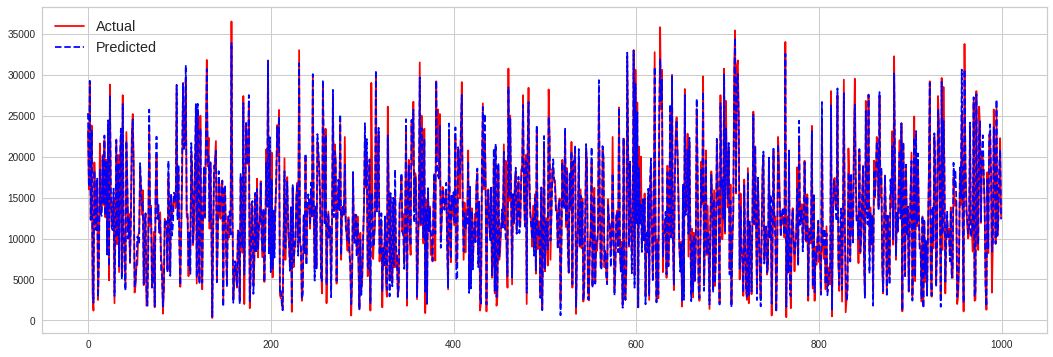

In [ ]:
realdata_pred.sellingprice.head(1000).plot(label = 'Actual', color = 'red')
realdata_pred.Label.head(1000).plot(label = 'Predicted', color = 'blue', linestyle = '--')
plt.legend(fontsize = 'large')